
# TestBulkEdge

Test the fluctuatona at the MP Bulk Edge resolve issue #64

https://github.com/CalculatedContent/WeightWatcher/issues/84


In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext watermark
%watermark

Last updated: 2021-08-14T23:39:54.546932-07:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.25.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 17.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit



### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import weightwatcher as ww
import torchvision.models as models


ww.__version__

DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


'0.4.9'

In [9]:

def marchenko_pastur_pdf(x_min, x_max, Q, sigma=1):
    y=1/Q
    x=np.arange(x_min,x_max,0.001)

    b=np.power(sigma*(1 + np.sqrt(1/Q)),2) # Largest eigenvalue
    a=np.power(sigma*(1 - np.sqrt(1/Q)),2) # Smallest eigenvalue
    return x, (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))

In [13]:
def plot_mp(evals, Q, sigma=1.0):
    ev = np.array(evals)
    x_min, x_max =  0, np.max(evals)

    x, mp = marchenko_pastur_pdf(x_min, x_max, Q, sigma)
    plt.plot(x,mp, linewidth=1, color = 'r', label="MP fit")

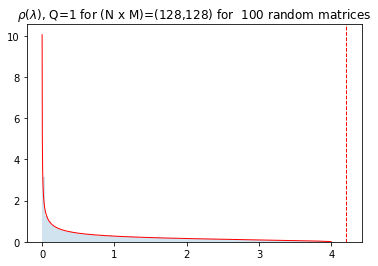

In [33]:
Q = 1
evals = []
R = 100
for idx in range(100):
    M = 128
    N = int(Q*M)
    W = np.random.normal(0,1,size=(N,M))
    X = (1/N)*np.dot(W.T,W)
    evals.extend(np.linalg.eigvals(X))
    
plt.hist(evals, bins=100, density=True, alpha=0.2);
plt.title(r"$\rho(\lambda)$, Q={} for (N x M)=({},{}) for  {} random matrices".format(Q, N, M, R))

plt.axvline(x=np.max(evals), color='r', linewidth=1, ls='dashed')
plot_mp(evals, Q)
plt.show()